In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# import data from npy file
location = '/mnt/ssd1/mehul_data/research/'
# fc_small = np.load(location + 'fc_small_data.npy', allow_pickle=True).item()
# sc = np.load(location + 'sc_data.npy', allow_pickle=True).item()
# fc_bnt = np.load(location + 'fc_bnt_data.npy', allow_pickle=True).item()
fc_large = np.load(location + 'fc_large_data.npy', allow_pickle=True).item()

In [4]:
fc_large['label'].shape

(812,)

In [5]:
# count number of samples with 1.0 as label
print(np.sum(fc_large['label'] == 1.0))
print(np.sum(fc_large['label'] == 0.0))


384
428


In [8]:
# # correct the label in sc and fc_small

# # replace label 2 with 0
# fc_small['label'][fc_small['label'] == 2] = 0
# sc['label'][sc['label'] == 2] = 0 

# # save the corrected data
# np.save(location + 'FC_data.npy', fc_small)
# np.save(location + 'SC_data.npy', sc)


### FC Large

In [3]:
(fc_large.keys())

dict_keys(['id', 'site', 'age', 'label', 'corr'])

In [4]:
# fc_large['site']
uni, freq = np.unique(fc_large['site'], return_counts=True)
print(len(uni), freq)

16 [ 56  53  22 102  36  25 144  25  61  90  51  31  27  32  29  28]


In [5]:
count = zip(uni, freq)
for i in count:
    print(i)

print(uni)

('BNI', 56)
('EMC', 53)
('ETH', 22)
('GU', 102)
('IP', 36)
('IU', 25)
('KKI', 144)
('KUL', 25)
('NYU', 61)
('OHSU', 90)
('SDSU', 51)
('TCD', 31)
('UCD', 27)
('UCLA', 32)
('USM', 29)
('U_MIA', 28)
['BNI' 'EMC' 'ETH' 'GU' 'IP' 'IU' 'KKI' 'KUL' 'NYU' 'OHSU' 'SDSU' 'TCD'
 'UCD' 'UCLA' 'USM' 'U_MIA']


In [6]:
# Inspect the first few items of the dictionary
for key, value in list(fc_large.items())[:5]:
    print(f"{key}: {type(value)}: {value.shape}")


id: <class 'numpy.ndarray'>: (812,)
site: <class 'numpy.ndarray'>: (812,)
age: <class 'numpy.ndarray'>: (812,)
label: <class 'numpy.ndarray'>: (812,)
corr: <class 'numpy.ndarray'>: (812, 400, 400)


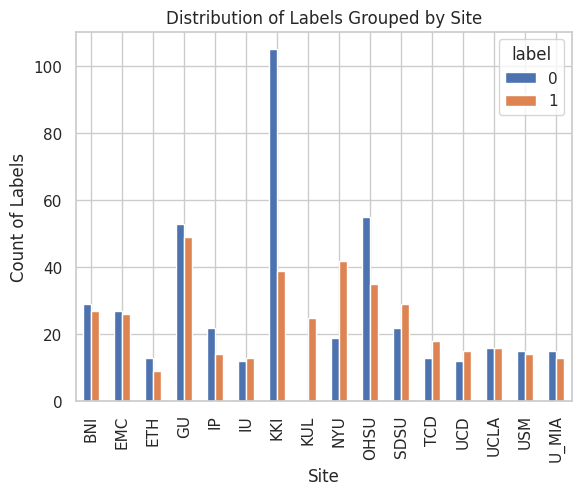

In [8]:
# Create a DataFrame using only 'site' and 'label'
fc_large_df = pd.DataFrame({
    'site': fc_large['site'],
    'label': fc_large['label']
})

# Now group by 'site' and 'label'
grouped_data = fc_large_df.groupby(['site', 'label']).size().unstack(fill_value=0)

# Plotting
sns.set(style="whitegrid")
grouped_data.plot(kind='bar', stacked=False)
plt.title('Distribution of Labels Grouped by Site')
plt.xlabel('Site')
plt.ylabel('Count of Labels')
plt.show()


In [13]:
# Export to CSV
grouped_data.to_csv('grouped_data.csv')


### FC

In [5]:
# find unique labels in fc
fc_unique_labels = np.unique(fc_['label'])
sc_unique_labels = np.unique(sc['label'])
print(fc_unique_labels, sc_unique_labels)

[0 1] [0 1]


In [10]:
# Convert to DataFrame
fc_small_df = pd.DataFrame({
    'corr': list(fc_small['corr']),
    'label': list(fc_small['label']),
    'site': list(fc_small['site']),
})


In [11]:

# print fc keys
print("Keys: ")
print(fc_small.keys())
print()

# print number of subjects:
print("Number of subjects: ")
print('corr rows: ', fc_small['corr'].shape[0])
print()

# print dimensions of data
print("Dimensions: ")
print('corr dim: ', fc_small['corr'][0].shape)
print('label dim: ', fc_small['label'][0].shape)
print('site dim: ', fc_small['site'][0].shape)
print()

# print type of data
print("Type: ")
print('corr type: ', type(fc_small['corr'][0]))
print('label type: ', type(fc_small['label'][0]))
print('site type: ', type(fc_small['site'][0]))

Keys: 
dict_keys(['corr', 'label', 'site'])

Number of subjects: 
corr rows:  205

Dimensions: 
corr dim:  (400, 400)
label dim:  ()
site dim:  ()

Type: 
corr type:  <class 'numpy.ndarray'>
label type:  <class 'numpy.int32'>
site type:  <class 'numpy.str_'>


In [12]:
# see the count of unique labels
print(fc_small_df['label'].value_counts())
print()

# see the count of unique sites
print(fc_small_df['site'].value_counts())
print()

# see the count of unique labels in each site
print(fc_small_df.groupby('site')['label'].value_counts())

label
1    113
0     92
Name: count, dtype: int64

site
BNI1     56
SDSU1    51
NYU1     47
IP1      36
NYU2     15
Name: count, dtype: int64

site   label
BNI1   0        29
       1        27
IP1    0        22
       1        14
NYU1   1        28
       0        19
NYU2   1        15
SDSU1  1        29
       0        22
Name: count, dtype: int64


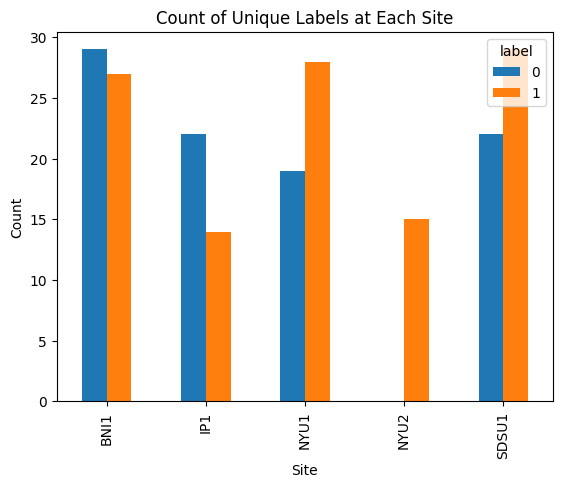

In [13]:
# Group by 'site' and 'label', then unstack to create a new dataframe
grouped_df = fc_small_df.groupby(['site', 'label']).size().unstack()

# Create the plot
grouped_df.plot(kind='bar')

# Label the axes and add title
plt.title('Count of Unique Labels at Each Site')
plt.ylabel('Count')
plt.xlabel('Site')

# Display the plot
plt.show()


min corr:  0   -0.78963
Name: corr, dtype: float64
max corr:  0    1.0
Name: corr, dtype: float64


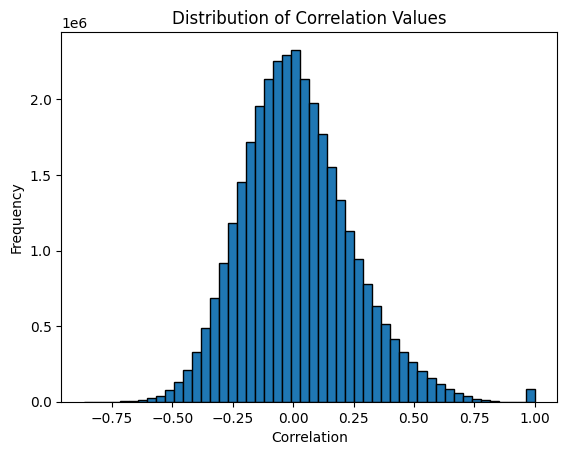

In [16]:
# min and max correlation values
print('min corr: ', fc_small_df['corr'].apply(np.min).head(1))
print('max corr: ', fc_small_df['corr'].apply(np.max).head(1))

# Flatten all correlation matrices into a single 1D array
corr_values = np.concatenate([corr.flatten()
                             for corr in fc_small_df['corr']], axis=0)

# Plot the histogram
plt.hist(corr_values, bins=50, edgecolor='black')
plt.title('Distribution of Correlation Values')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Distribution of Correlation Values')
plt.show()

### SC:

In [21]:
# Convert to DataFrame
sc_df = pd.DataFrame({
    'sc': list(sc['sc']),
    'label': list(sc['label']),
    'site': list(sc['site']),
})


In [22]:
# print fc keys
print("Keys: ")
print(sc.keys())
print()

# print number of subjects:
print("Number of subjects: ")
print('corr rows: ', sc_df['corr'].shape[0])
print()

# print dimensions of data
print("Dimensions: ")
print('corr dim: ', sc_df['corr'][0].shape)

print()

# print type of data
print("Type: ")
print('corr type: ', type(sc_df['corr'][0]))
print('label type: ', type(sc_df['label'][0]))
print('site type: ', type(sc_df['site'][0]))


Keys: 
dict_keys(['sc', 'label', 'site'])



In [25]:
# range of sc values
print('min: ', sc['sc'].min())
print('max: ', sc['sc'].max())

min:  0.0
max:  32.8280094647067


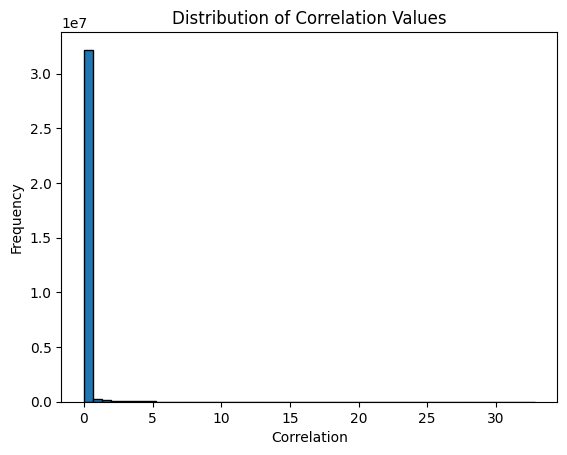

In [23]:
# Flatten all correlation matrices into a single 1D array
sc_values = np.concatenate([sc.flatten()
                             for sc in sc_df['sc']], axis=0)

# Plot the histogram
plt.hist(sc_values, bins=50, edgecolor='black')
plt.title('Distribution of Correlation Values')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Distribution of Correlation Values')
plt.show()


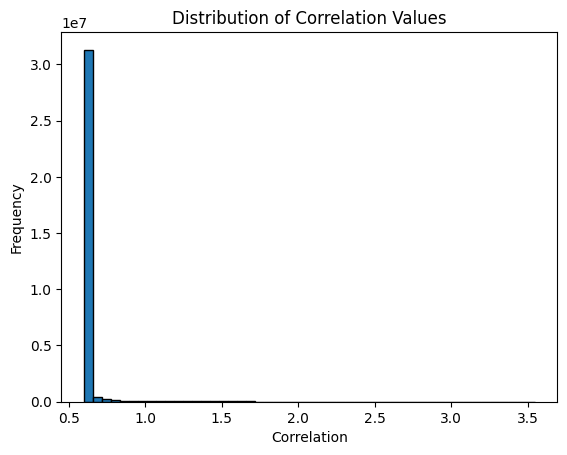

In [28]:
# Apply log transformation
# Shift values to be positive before applying log
sc_values_log = np.log(sc_values + 1 - corr_values.min())

# Plot the histogram
plt.hist(sc_values_log, bins=50, edgecolor='black')
plt.title('Distribution of Correlation Values')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Distribution of Correlation Values')
plt.show()


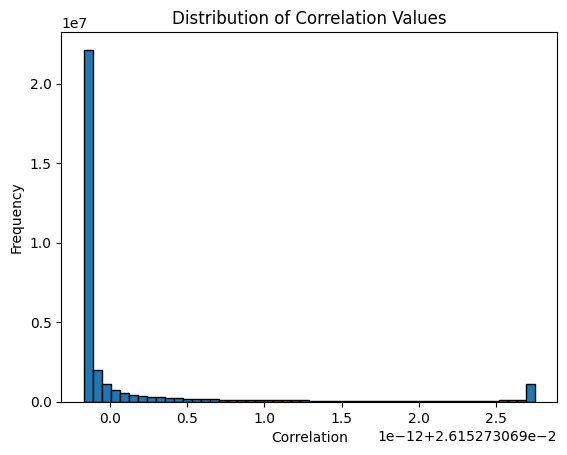

In [31]:
from scipy import stats

# Apply Box-Cox transformation
# Shift values to be positive before applying Box-Cox
sc_values_boxcox = stats.boxcox(sc_values - corr_values.min() + 1)[0]

# Plot the histogram
plt.hist(sc_values_boxcox, bins=50, edgecolor='black')
plt.title('Distribution of Correlation Values')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Distribution of Correlation Values')
plt.show()


In [33]:
# Flatten all 'sc' arrays into a single 1D array
flattened_sc = np.concatenate(sc_df['sc'].apply(
    lambda x: x.flatten()).to_list(), axis=0)

# Calculate statistics for the flattened array
mean = flattened_sc.mean()
median = np.median(flattened_sc)
minimum = flattened_sc.min()
maximum = flattened_sc.max()
std_dev = flattened_sc.std()
variance = flattened_sc.var()

print('Mean: ', mean)
print('Median: ', median)
print('Min: ', minimum)
print('Max: ', maximum)
print('Standard Deviation: ', std_dev)
print('Variance: ', variance)


Mean:  0.05848469687909355
Median:  0.0
Min:  0.0
Max:  32.8280094647067
Standard Deviation:  0.4405368810785745
Variance:  0.19407274359043813


In [39]:
# Calculate percentiles
percentiles = [95, 90, 80, 60]
values = [np.percentile(flattened_sc, percentile)
          for percentile in percentiles]

# Count the number of values above each percentile
counts = [(flattened_sc > value).sum() for value in values]

# Print percentiles and counts
for percentile, value, count in zip(percentiles, values, counts):
    print(f'{percentile}th percentile: {value}, count: {count}')


95th percentile: 0.09289132440885903, count: 8000.0
90th percentile: 0.022808376582191744, count: 16000.0
80th percentile: 0.004363070288580245, count: 32000.0
60th percentile: 0.0003618346181231611, count: 64000.0


In [45]:
# Define the percentiles you're interested in
percentiles = [95, 90, 80, 60]

# Group sc_df by site and apply the percentile calculation to each group
site_percentiles = sc_df.groupby('site')['sc'].apply(
    lambda group: [np.percentile(np.concatenate([arr.flatten() for arr in group]), p) for p in percentiles])

# Convert the series to a DataFrame
site_percentiles_df = pd.DataFrame(site_percentiles.to_list(),
                                   index=site_percentiles.index,
                                   columns=[f'{p}th percentile' for p in percentiles])

# Display the DataFrame
print(site_percentiles_df)


       95th percentile  90th percentile  80th percentile  60th percentile
site                                                                     
BNI1          0.097891         0.027637         0.006364         0.000906
IP1           0.125006         0.034851         0.007719         0.000989
NYU1          0.075238         0.006641         0.000000         0.000000
NYU2          0.075006         0.006335         0.000000         0.000000
SDSU1         0.081266         0.025307         0.006471         0.001029


In [46]:
# Define the percentiles you're interested in
percentiles = [95, 90, 80, 60]

# Group sc_df by label and apply the percentile calculation to each group
label_percentiles = sc_df.groupby('label')['sc'].apply(
    lambda group: [np.percentile(np.concatenate([arr.flatten() for arr in group]), p) for p in percentiles])

# Convert the series to a DataFrame
label_percentiles_df = pd.DataFrame(label_percentiles.to_list(),
                                    index=label_percentiles.index,
                                    columns=[f'{p}th percentile' for p in percentiles])

# Display the DataFrame
print(label_percentiles_df)


       95th percentile  90th percentile  80th percentile  60th percentile
label                                                                    
0             0.096580         0.025243         0.005224         0.000549
1             0.089725         0.020764         0.003696         0.000216


### FC BNT Paper

In [31]:
# print fc keys
print("Keys: ")
print(fc_bnt.keys())
print()

# print number of subjects:
print("Number of subjects: ")
print('corr rows: ', fc_bnt['corr'].shape[0])
print()

# print dimensions of data
print("Dimensions: ")
print('corr dim: ', fc_bnt['corr'][0].shape)
print('label dim: ', fc_bnt['label'][0].shape)
print('site dim: ', fc_bnt['site'][0].shape)
print()

# print type of data
print("Type: ")
print('corr type: ', type(fc_bnt['corr'][0]))
print('label type: ', type(fc_bnt['label'][0]))
print('site type: ', type(fc_bnt['site'][0]))


Keys: 
dict_keys(['timeseires', 'label', 'corr', 'pcorr', 'site'])

Number of subjects: 
corr rows:  1009

Dimensions: 
corr dim:  (200, 200)
label dim:  ()
site dim:  ()

Type: 
corr type:  <class 'numpy.ndarray'>
label type:  <class 'numpy.float64'>
site type:  <class 'numpy.str_'>


In [33]:
# Convert to DataFrame
fc_bnt_df = pd.DataFrame({
    'timeseries': list(fc_bnt['timeseires']),
    'corr': list(fc_bnt['corr']),
    'pcorr': list(fc_bnt['pcorr']),
    'label': list(fc_bnt['label']),
    'site': list(fc_bnt['site']),
})

In [34]:
# find unique labels in fc
fc_unique_labels = fc_bnt_df['label'].unique()
print(fc_unique_labels)


[0. 1.]


In [38]:
# see the count of unique labels
print(fc_bnt_df['label'].value_counts())
print()

# see the count of unique sites
# print(fc_bnt_df['site'].value_counts())
# print()

# number of sites
print('number of sites: ', len(fc_bnt_df['site'].unique()))
print()

# see the count of unique labels in each site
print(fc_bnt_df.groupby('site')['label'].value_counts())


label
1.0    516
0.0    493
Name: count, dtype: int64

number of sites:  19

site      label
CALTECH   0.0       19
          1.0       18
CMU       0.0       14
          1.0       13
KKI       1.0       28
          0.0       20
LEUVEN_1  1.0       15
          0.0       14
LEUVEN_2  1.0       19
          0.0       15
MAX_MUN   1.0       28
          0.0       24
NYU       1.0      100
          0.0       75
OLIN      0.0       19
          1.0       15
PITT      0.0       29
          1.0       27
SBL       0.0       15
          1.0       15
SDSU      1.0       22
          0.0       14
STANFORD  1.0       20
          0.0       19
TRINITY   1.0       25
          0.0       22
UCLA_1    0.0       41
          1.0       31
UCLA_2    0.0       13
          1.0       13
UM_1      0.0       53
          1.0       53
UM_2      1.0       21
          0.0       13
USM       0.0       46
          1.0       25
YALE      1.0       28
          0.0       28
Name: count, dtype: int64


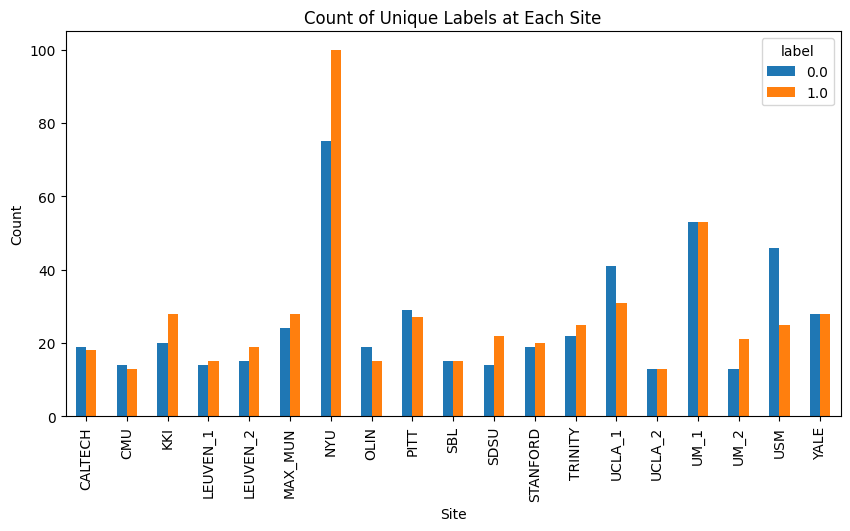

In [41]:
# Group by 'site' and 'label', then unstack to create a new dataframe
grouped_df = fc_bnt_df.groupby(['site', 'label']).size().unstack()

# Create the plot
grouped_df.plot(kind='bar')

# Label the axes and add title
plt.title('Count of Unique Labels at Each Site')
plt.ylabel('Count')
plt.xlabel('Site')

# increase figure size
plt.gcf().set_size_inches(10, 5)

# Display the plot
plt.show()


min corr:  0   -0.375761
Name: corr, dtype: float64
max corr:  0    1.730939
Name: corr, dtype: float64


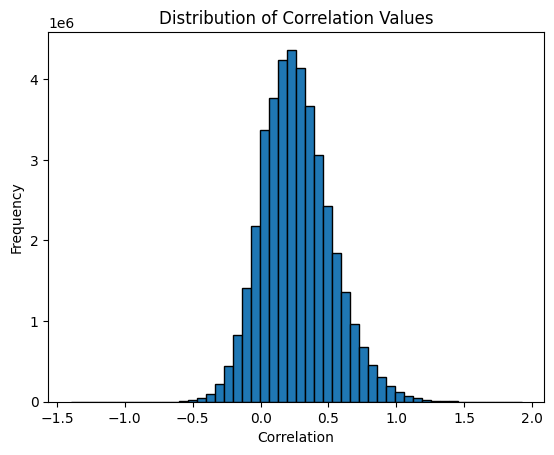

In [44]:
# min and max correlation values
print('min corr: ', fc_bnt_df['corr'].apply(np.min).head(1))
print('max corr: ', fc_bnt_df['corr'].apply(np.max).head(1))

# Flatten all correlation matrices into a single 1D array
corr_values = np.concatenate([corr.flatten()
                             for corr in fc_bnt_df['corr']], axis=0)

# Plot the histogram
plt.hist(corr_values, bins=50, edgecolor='black')
plt.title('Distribution of Correlation Values')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Distribution of Correlation Values')
plt.show()

min corr:  0   -0.188438
Name: pcorr, dtype: float64
max corr:  0    0.439145
Name: pcorr, dtype: float64


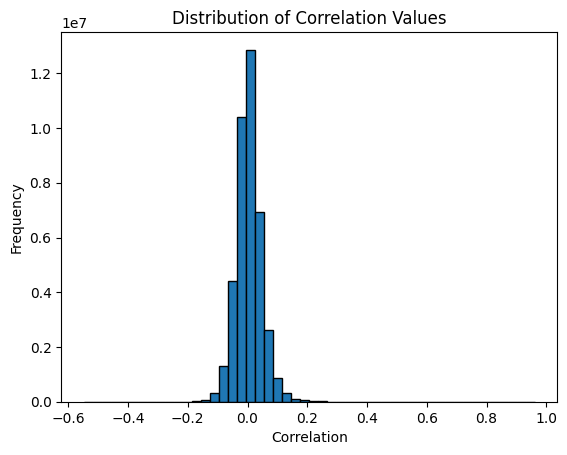

In [45]:
# min and max correlation values
print('min corr: ', fc_bnt_df['pcorr'].apply(np.min).head(1))
print('max corr: ', fc_bnt_df['pcorr'].apply(np.max).head(1))

# Flatten all correlation matrices into a single 1D array
corr_values = np.concatenate([corr.flatten()
                             for corr in fc_bnt_df['pcorr']], axis=0)

# Plot the histogram
plt.hist(corr_values, bins=50, edgecolor='black')
plt.title('Distribution of Correlation Values')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Distribution of Correlation Values')
plt.show()
